# First attempt of decission tree.

We import sklearn, pandas and os libraries.

In [4]:
from sklearn import *
import pandas as pd

In [5]:
import os

We will load a complete project ir order to train our model. We select Flower project because it has a medium extension and a variety of generators.

We are improving this type os training by constructing a full dataframe with more than one project. The idea will be to train the model with 70% of our labelled projects, and the other 30% will be used to test the quality of the tree.  

In [6]:
path_df = "C:\\Users\\dminetca\\OneDrive - Capgemini\\Desktop\\generatorfind\\discern\\output\\flower\\LabelFolder_flower\\LabelFolderWithGen_flower"

In [7]:
ls = []
for root, dirs, files in os.walk(path_df):
    for file in files:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)
            ls.append(df)

In [8]:
df = pd.concat(ls)

We have loaded the dataframe. Now , we will check that it is correct.

In [9]:
df.head()

,node_id,class_name,parent_id,Generator
0,0,100,-1,0
1,1,73,0,0
2,2,75,1,0
3,3,73,0,0
4,4,75,3,0


We check its shape.

In [10]:
df.shape

(25275, 4)

The next step is to select the target column. We want to predict is some nodes are part of a generator scope. That's why we crop the 'Generator' column.

In [11]:
inputs = df.drop('Generator', axis='columns')
inputs.head()

,node_id,class_name,parent_id
0,0,100,-1
1,1,73,0
2,2,75,1
3,3,73,0
4,4,75,3


As we mentioned, we will select that column as the target.

In [12]:
target = df['Generator']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Generator, dtype: int64

In this two chunks, we will load the Decision Tree Classifier and we will fit it.

As first approach, we will load the parameters of the training as default. Our idea is to check the results to see if it has sense, and after this, to improve the model by changing the parameters with some criteria.

In [13]:
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(inputs, target)

DecisionTreeClassifier()

We check that the score of the model with the Flower project is 1.0. It is because we trained the model just with this project. 

In [15]:
model.score(inputs, target)

1.0

In [16]:
model.n_features_

3

On this step we check that the decision tree is making a correct number of leafs and what are the "questions" that it
 makes.

[Text(237.8842105263158, 207.55636363636364, 'X[0] <= 13185.5\ngini = 0.212\nsamples = 25275\nvalue = [22233, 3042]'),
 Text(158.58947368421053, 187.7890909090909, 'X[2] <= 10996.5\ngini = 0.352\nsamples = 13186\nvalue = [10176, 3010]'),
 Text(70.48421052631579, 168.0218181818182, 'X[2] <= 6244.0\ngini = 0.164\nsamples = 11005\nvalue = [10013, 992]'),
 Text(61.67368421052632, 148.25454545454545, 'gini = 0.0\nsamples = 6261\nvalue = [6261, 0]'),
 Text(79.29473684210527, 148.25454545454545, 'X[0] <= 8215.5\ngini = 0.331\nsamples = 4744\nvalue = [3752, 992]'),
 Text(44.05263157894737, 128.48727272727274, 'X[0] <= 8027.5\ngini = 0.477\nsamples = 1960\nvalue = [1188, 772]'),
 Text(35.242105263157896, 108.72, 'X[0] <= 6389.5\ngini = 0.442\nsamples = 1772\nvalue = [1188, 584]'),
 Text(17.621052631578948, 88.95272727272729, 'X[0] <= 6247.5\ngini = 0.027\nsamples = 144\nvalue = [2, 142]'),
 Text(8.810526315789474, 69.18545454545455, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(26.431578947

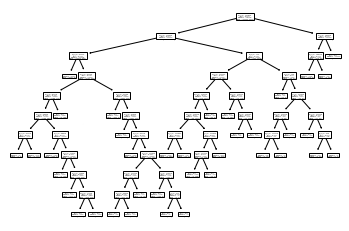

In [17]:
tree.plot_tree(model)

We test the model with Percol project. 
This project has some properties in common with Flower. For example, the extension and the number of generators.

In [25]:
path_df_validation = "C:\\Users\\dminetca\\OneDrive - Capgemini\\Desktop\\generatorfind\\discern\\output\\percol\\LabelFolder_percol\\LabelFolderWithGen_percol"

In [26]:
ls = []
for root, dirs, files in os.walk(path_df_validation):
    for file in files:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)
            ls.append(df)

In [27]:
df_validation = pd.concat(ls)

In [28]:
inputs_validation = df_validation.drop('Generator', axis='columns')
target_validation = df_validation['Generator']

In [29]:
model.score(inputs_validation, target_validation)

0.8848380676678126

We test the model with Face Recognition project. This project is a trap because it doesn't have generator pattern inside.

In [23]:
path_df_validation = "C:\\Users\\dminetca\\OneDrive - Capgemini\\Desktop\\generatorfind\\discern\\output\\face_recognition\\LabelFolder_face_recognition\\LabelFolderWithGen_face_recognition"
ls = []
for root, dirs, files in os.walk(path_df_validation):
    for file in files:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)
            ls.append(df)
df_validation = pd.concat(ls)
inputs_validation = df_validation.drop('Generator', axis='columns')
target_validation = df_validation['Generator']
model.score(inputs_validation, target_validation)

0.777658266748617

We test the model with Faceswap project. 
This project is a proffesional one and it has some properties in common with Flower. For example, the extension and the number of generators.

In [24]:
path_df_validation = "C:\\Users\\dminetca\\OneDrive - Capgemini\\Desktop\\generatorfind\\discern\\output\\faceswap\\LabelFolder_faceswap\\LabelFolderWithGen_faceswap"
ls = []
for root, dirs, files in os.walk(path_df_validation):
    for file in files:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)
            ls.append(df)
df_validation = pd.concat(ls)
inputs_validation = df_validation.drop('Generator', axis='columns')
target_validation = df_validation['Generator']
model.score(inputs_validation, target_validation)

0.9792102930531955